
# 随机森林分类模型 - 完整流程

柯磊
     展示如何使用随机森林分类模型进行数据分析，包括以下步骤：
1. 加载数据集
2. 划分训练集和测试集
3. 特征缩放
4. 创建并训练模型
5. 计算模型评估指标：如平均绝对误差、均方误差等
6. 绘制学习曲线、混淆矩阵和ROC曲线
7. 获取特征重要性和模型准确性


# 加载数据集（data.csv）

使用 pandas 加载数据集并显示前几行，以便用户确认数据集的加载情况。

In [15]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import MinMaxScaler
from matplotlib import rcParams

# 设置中文字体
rcParams['font.sans-serif'] = ['SimHei']  # 黑体
rcParams['axes.unicode_minus'] = False  # 显示负号


# 划分数据集为训练集和测试集

将数据集分为特征（X）和目标（y），并按照 70% 训练集、30% 测试集进行划分。

In [16]:

# 载入自己的数据集
data = pd.read_csv('data.csv')

# 查看数据集的前几行
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# 特征缩放

使用 MinMaxScaler 对特征进行缩放，以确保所有特征的值在相同的范围内。

In [17]:
# 假设目标列为 'diagnosis'，特征列为所有其他列
X = data.drop('diagnosis', axis=1)  # 特征
y = data['diagnosis']  # 目标

# 将目标列 'diagnosis' 转换为二元分类（例如 0: 'B' 表示良性，1: 'M' 表示恶性）
y = y.map({'B': 0, 'M': 1})

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("数据集拆分情况：")
print("训练集：", X_train.shape)
print("测试集：", X_test.shape)


数据集拆分情况：
训练集： (398, 32)
测试集： (171, 32)


# 创建随机森林分类器并训练模型

创建一个随机森林分类器模型并在训练集上进行训练，同时计算平均绝对误差（MAE）和均方根误差（MSE）。

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 假设你已经加载了 X_train 和 X_test

# 检查是否有任何NaN值，并填充为0
X_train = pd.DataFrame(X_train).fillna(0).values
X_test = pd.DataFrame(X_test).fillna(0).values

# 确保所有列的数据没有NaN值
print("训练集是否存在NaN值：", np.any(np.isnan(X_train)))
print("测试集是否存在NaN值：", np.any(np.isnan(X_test)))

# 如果仍有NaN值，删除包含NaN的行或列
# 这一步仅当数据中仍有NaN时使用
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

X_train = X_train.dropna(axis=1, how='all')  # 删除全为NaN的列
X_test = X_test.dropna(axis=1, how='all')   # 删除全为NaN的列

# 使用MinMaxScaler进行缩放
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 检查是否还有NaN值
print("训练集NaN检查：", np.any(np.isnan(X_train)))
print("测试集NaN检查：", np.any(np.isnan(X_test)))


训练集是否存在NaN值： False
测试集是否存在NaN值： False
训练集NaN检查： False
测试集NaN检查： False


# 模型得分

计算并显示模型在训练集和测试集上的得分，帮助评估模型的表现。

In [19]:

# 创建随机森林分类器
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# 预测
y_pred = rf.predict(X_test)

# 计算平均绝对误差和均方根误差
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)


Mean Absolute Error: 0.029239766081871343
Mean Squared Error: 0.029239766081871343


# 获取并打印特征重要性

计算模型中每个特征的重要性，并按降序排序显示结果。

In [20]:

# 模型得分
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)
print("训练集得分：{:.4f}".format(train_score))
print("测试集得分：{:.4f}".format(test_score))


训练集得分：0.9925
测试集得分：0.9708


# 绘制学习曲线

绘制训练集和测试集的学习曲线，帮助分析模型在不同样本量下的表现。

In [21]:

# 获取特征重要性
feature_importances = rf.feature_importances_
features = X.columns  # 假设X是DataFrame
importance_series = pd.Series(feature_importances, index=features)

# 打印特征重要性
print(importance_series.sort_values(ascending=False))


concave points_worst       0.189205
perimeter_worst            0.113409
area_worst                 0.111744
concave points_mean        0.102775
radius_worst               0.095603
concavity_worst            0.040862
concavity_mean             0.040050
area_se                    0.039031
area_mean                  0.038422
perimeter_mean             0.034290
radius_mean                0.028069
perimeter_se               0.018764
texture_worst              0.017996
symmetry_worst             0.017293
compactness_mean           0.013673
compactness_worst          0.011562
smoothness_worst           0.011167
radius_se                  0.010687
texture_mean               0.009359
concave points_se          0.007121
fractal_dimension_worst    0.006832
id                         0.006094
fractal_dimension_se       0.005373
smoothness_mean            0.004855
symmetry_se                0.004813
smoothness_se              0.004802
compactness_se             0.004097
fractal_dimension_mean     0

# 绘制混淆矩阵

绘制混淆矩阵，评估模型的分类效果，并输出各个类别的预测结果。

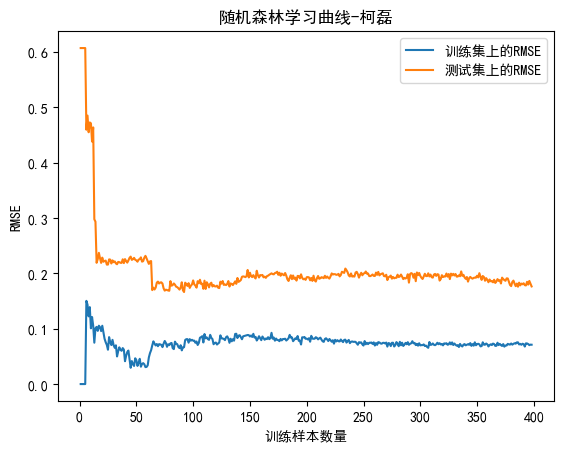

In [22]:

# 绘制学习曲线
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    # 初始化列表
    train_scores = []
    test_scores = []

    for i in range(1, len(X_train) + 1):
        algo.fit(X_train[:i], y_train[:i])

        y_train_predict = algo.predict(X_train[:i])
        train_rmse = np.sqrt(mean_squared_error(y_train[:i], y_train_predict))
        train_scores.append(train_rmse)

        y_test_predict = algo.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
        test_scores.append(test_rmse)

    plt.plot(range(1, len(X_train) + 1), train_scores, label="训练集上的RMSE")
    plt.plot(range(1, len(X_train) + 1), test_scores, label="测试集上的RMSE")
    plt.title("随机森林学习曲线-柯磊")
    plt.xlabel("训练样本数量")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()

# 调用绘制学习曲线的函数
plot_learning_curve(RandomForestRegressor(), X_train, X_test, y_train, y_test)


# 计算ROC曲线和AUC

计算并绘制ROC曲线，并计算AUC值，评估模型的分类能力。

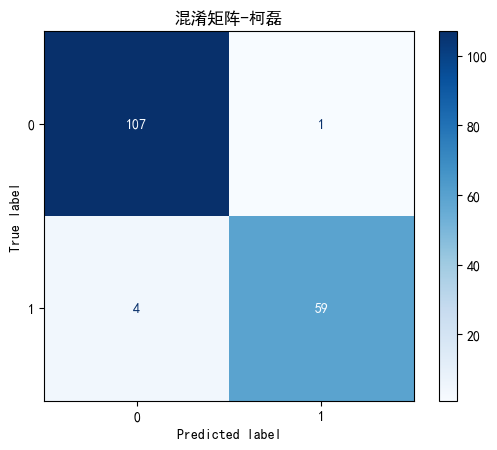

In [23]:

# 绘制混淆矩阵
def plot_confusion_matrix(y_test, y_pred, title_suffix="-柯磊"):
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(cm).plot(cmap='Blues')
    plt.rcParams['font.family'] = 'SimHei'
    plt.title(f"混淆矩阵{title_suffix}")
    plt.show()

plot_confusion_matrix(y_test, y_pred)


# 分类报告

输出模型在测试集上的分类报告，展示模型的精确度、召回率和F1分数等指标。

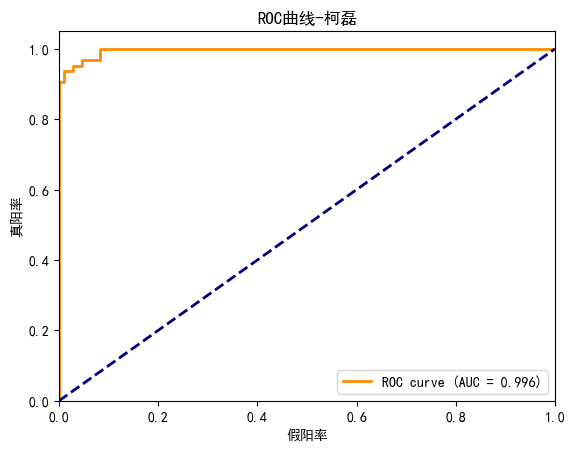

In [24]:

# 计算ROC曲线和AUC
predict_probs = rf.predict_proba(X_test)
y_score = predict_probs[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假阳率')
plt.ylabel('真阳率')
plt.title('ROC曲线-柯磊')
plt.legend(loc="lower right")
plt.show()


# 最终模型准确率与特征重要性排序

重新训练模型，并输出模型的准确率以及特征的重要性排序。

In [25]:

# 分类报告
print(classification_report(y_test, y_pred, target_names=["恶性", "良性"]))


              precision    recall  f1-score   support

          恶性       0.96      0.99      0.98       108
          良性       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# 绘制学习曲线

绘制交叉验证下的学习曲线，帮助分析不同训练样本下的模型表现。

In [26]:

# 创建新的随机森林分类器模型
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# 计算模型准确率
accuracy = accuracy_score(y_test, y_pred)
print("模型准确率:", accuracy)

# 获取特征重要性并排序
feature_importance = rf_model.feature_importances_
indices = np.argsort(feature_importance)[::-1]
print("特征重要性排序:")
for i, feature_index in enumerate(indices):
    print(f"{i + 1}. {X.columns[feature_index]}: {feature_importance[feature_index]}")


模型准确率: 0.9707602339181286
特征重要性排序:
1. concave points_worst: 0.18337484404720605
2. perimeter_worst: 0.11246525433588665
3. area_worst: 0.10974721004477084
4. concave points_mean: 0.09922386111433903
5. radius_worst: 0.09294439733916915
6. concavity_worst: 0.04174442120958375
7. area_se: 0.03881365977119478
8. area_mean: 0.0364126996359638
9. concavity_mean: 0.03565126203935438
10. perimeter_mean: 0.03456821510812361
11. radius_mean: 0.030449157752062778
12. texture_worst: 0.019673395433384235
13. perimeter_se: 0.01893640287723202
14. symmetry_worst: 0.015171822316528551
15. compactness_mean: 0.014829029695628462
16. compactness_worst: 0.013413687235227043
17. texture_mean: 0.01335947979196553
18. smoothness_worst: 0.01034823424646244
19. radius_se: 0.010142574487990396
20. fractal_dimension_se: 0.00913893660490422
21. id: 0.008693319677887043
22. concave points_se: 0.00779369365439042
23. fractal_dimension_worst: 0.006492674223924818
24. concavity_se: 0.006429113633914163
25. smoothnes

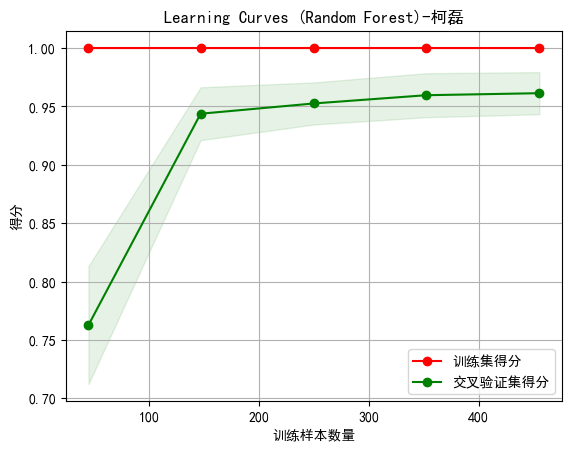

In [27]:

# 绘制学习曲线
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("训练样本数量")
    plt.ylabel("得分")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="训练集得分")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="交叉验证集得分")
    plt.legend(loc="best")
    plt.show()

# 绘制学习曲线
title = "Learning Curves (Random Forest)-柯磊"
plot_learning_curve(rf_model, title, X, y, cv=5)
